#Problem Statement
> With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. 

> To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge

> The cost of acquiring a new customer is far more than that for retaining the existing one.

> Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.



 

#Dataset:
##Input Features:
*   AccountWeeks: number of weeks customer has had active account
*   ContractRenewal: 1 if customer recently renewed contract, 0 if not
*   DataPlan: 1 if customer has data plan, 0 if not
*   DataUsage: gigabytes of monthly data usage
*   CustServCalls: number of calls into customer service
*   DayMins: average daytime minutes per month
*   DayCalls: average number of daytime calls
*   MonthlyCharge: average monthly bill
*   OverageFee: largest overage fee in last 12 months
*   RoamMins: average number of roaming minutes


##Output Feature:
*   **Churn: 1 if customer cancelled service, 0 if not** 












What variables are contributing to customer churn?
Who are the customers more likely to churn?
What actions can be taken to stop them from leaving?

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
df = pd.read_csv('/content/telecom_churn.csv')
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [33]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


None

##Data Cleaning

###Check and handling missing values

In [34]:
df.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

###No null values found

##Exploratory Data Analysis

**Distribution of target column:**

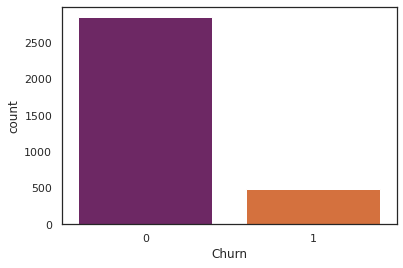

In [35]:
sns.countplot(x='Churn', data=df, palette='inferno')

In [36]:
print(df['Churn'].value_counts())

0    2850
1     483
Name: Churn, dtype: int64


In [37]:
Y = df["Churn"]
Y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64

##Distribution of Categorical Features

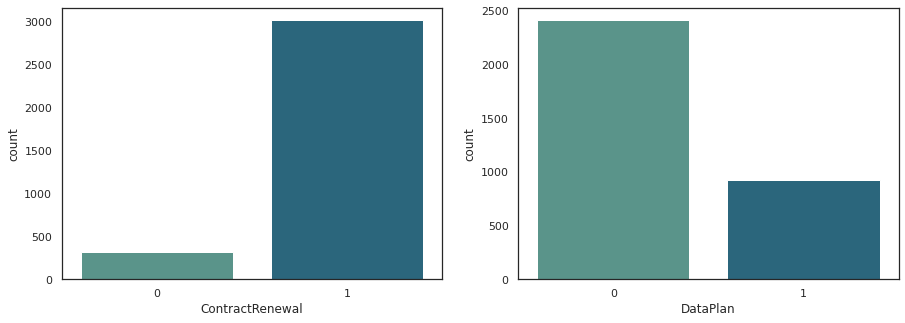

In [38]:
cat_cols = ['ContractRenewal','DataPlan']
plt.figure(figsize=(15, 5))
for n, variable in enumerate(cat_cols):
    ax = plt.subplot(1, 2, n + 1)
    g=sns.countplot(data=df, x=df[variable], ax=ax, palette='crest')
plt.show() 

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

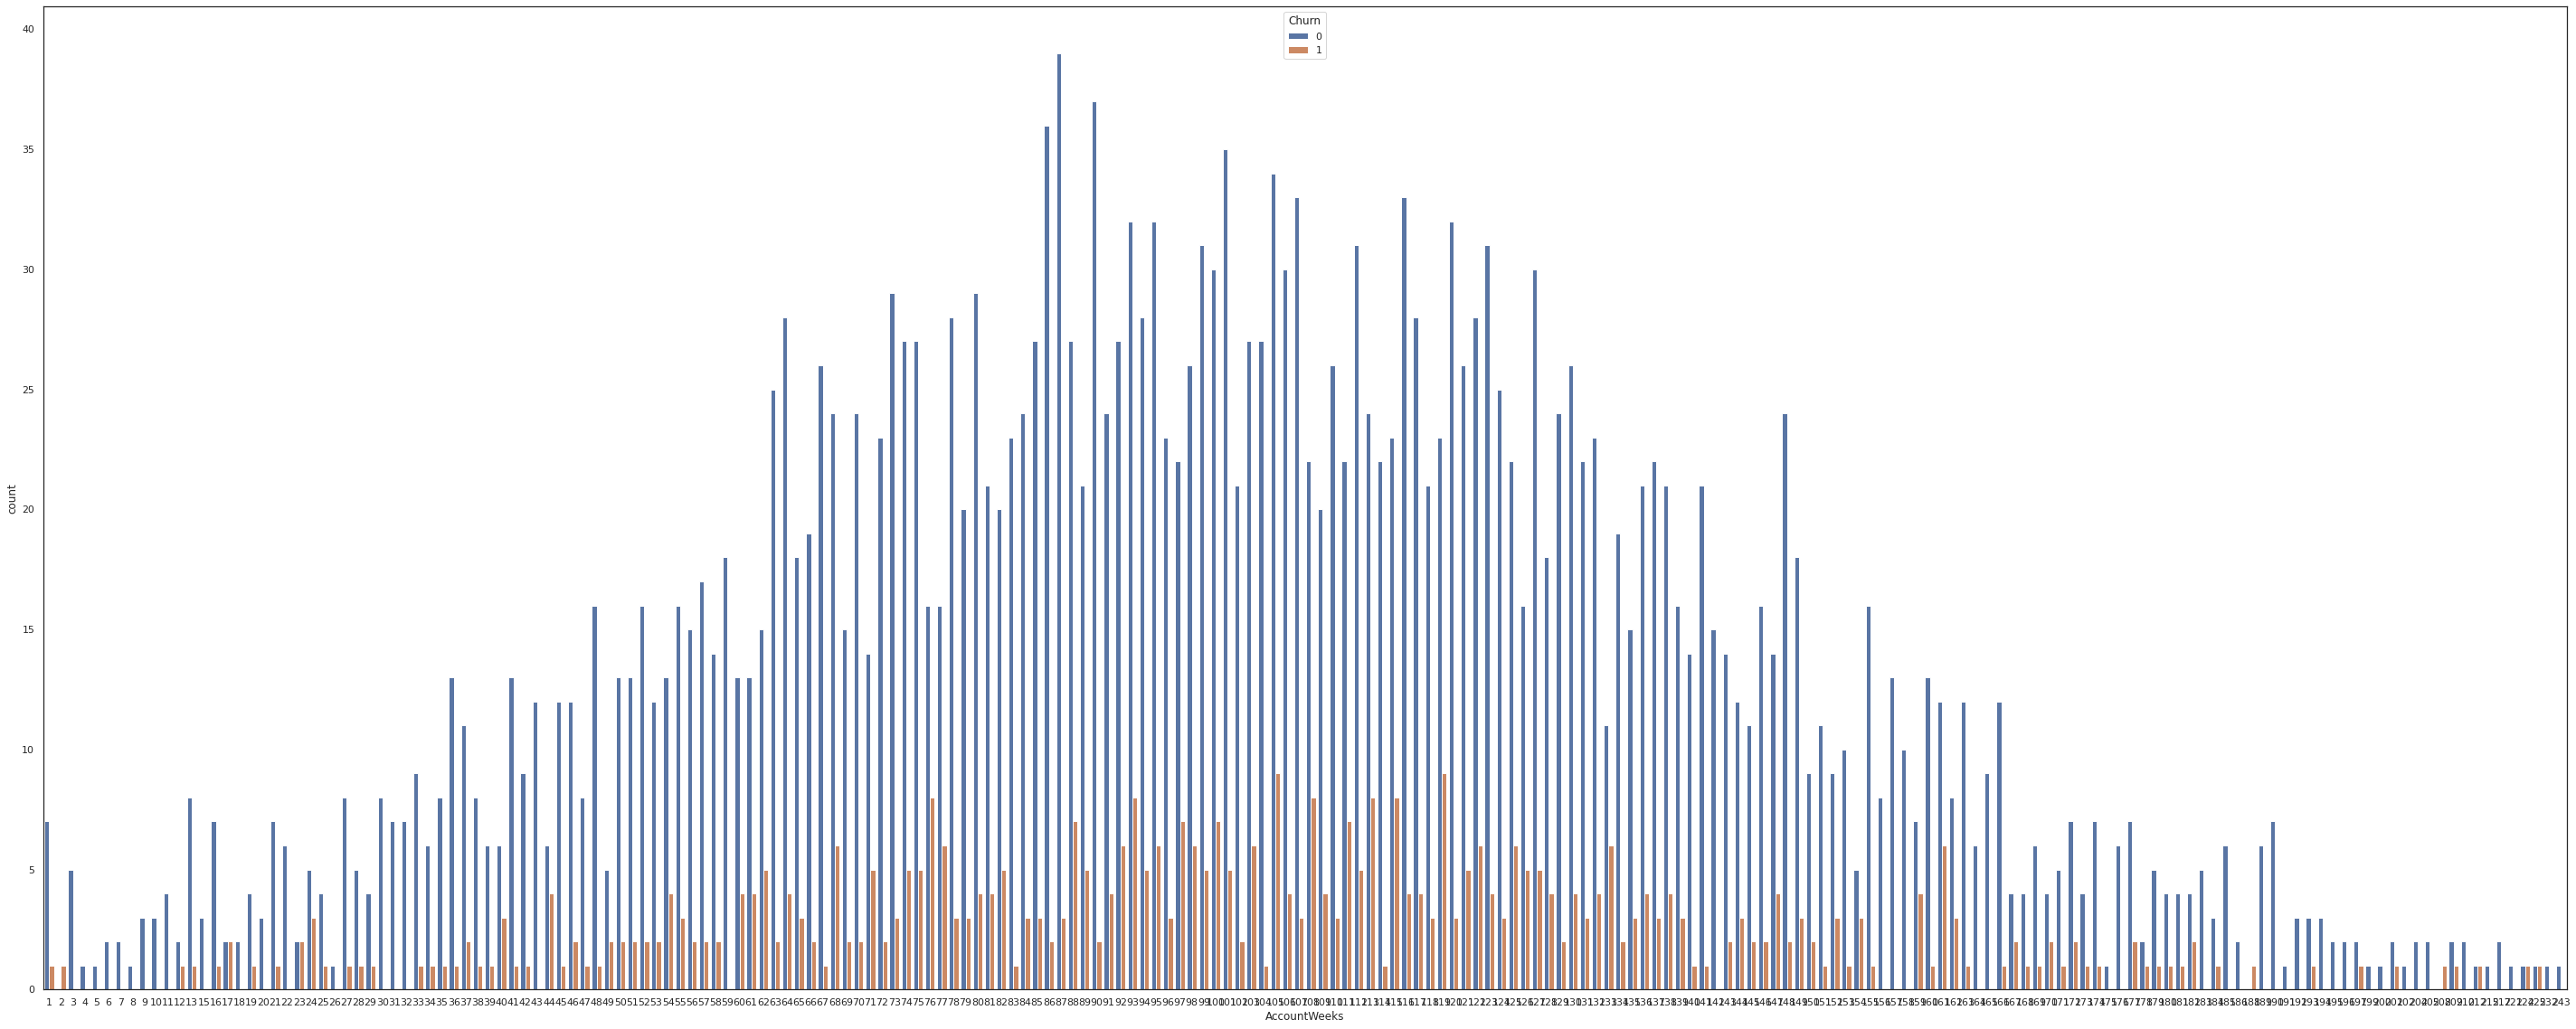

In [39]:
plt.figure(figsize=(50,20)) 
sns.set(style='white')
sns.countplot(x="AccountWeeks",hue="Churn",data=df) 
plt.xticks(rotation=0,)

##**From the above plot, if the AccountWeeks are more than 90 i.e. in the range 90-120 AccountWeeks, the Customer Churn is more**

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173]),
 <a list of 174 

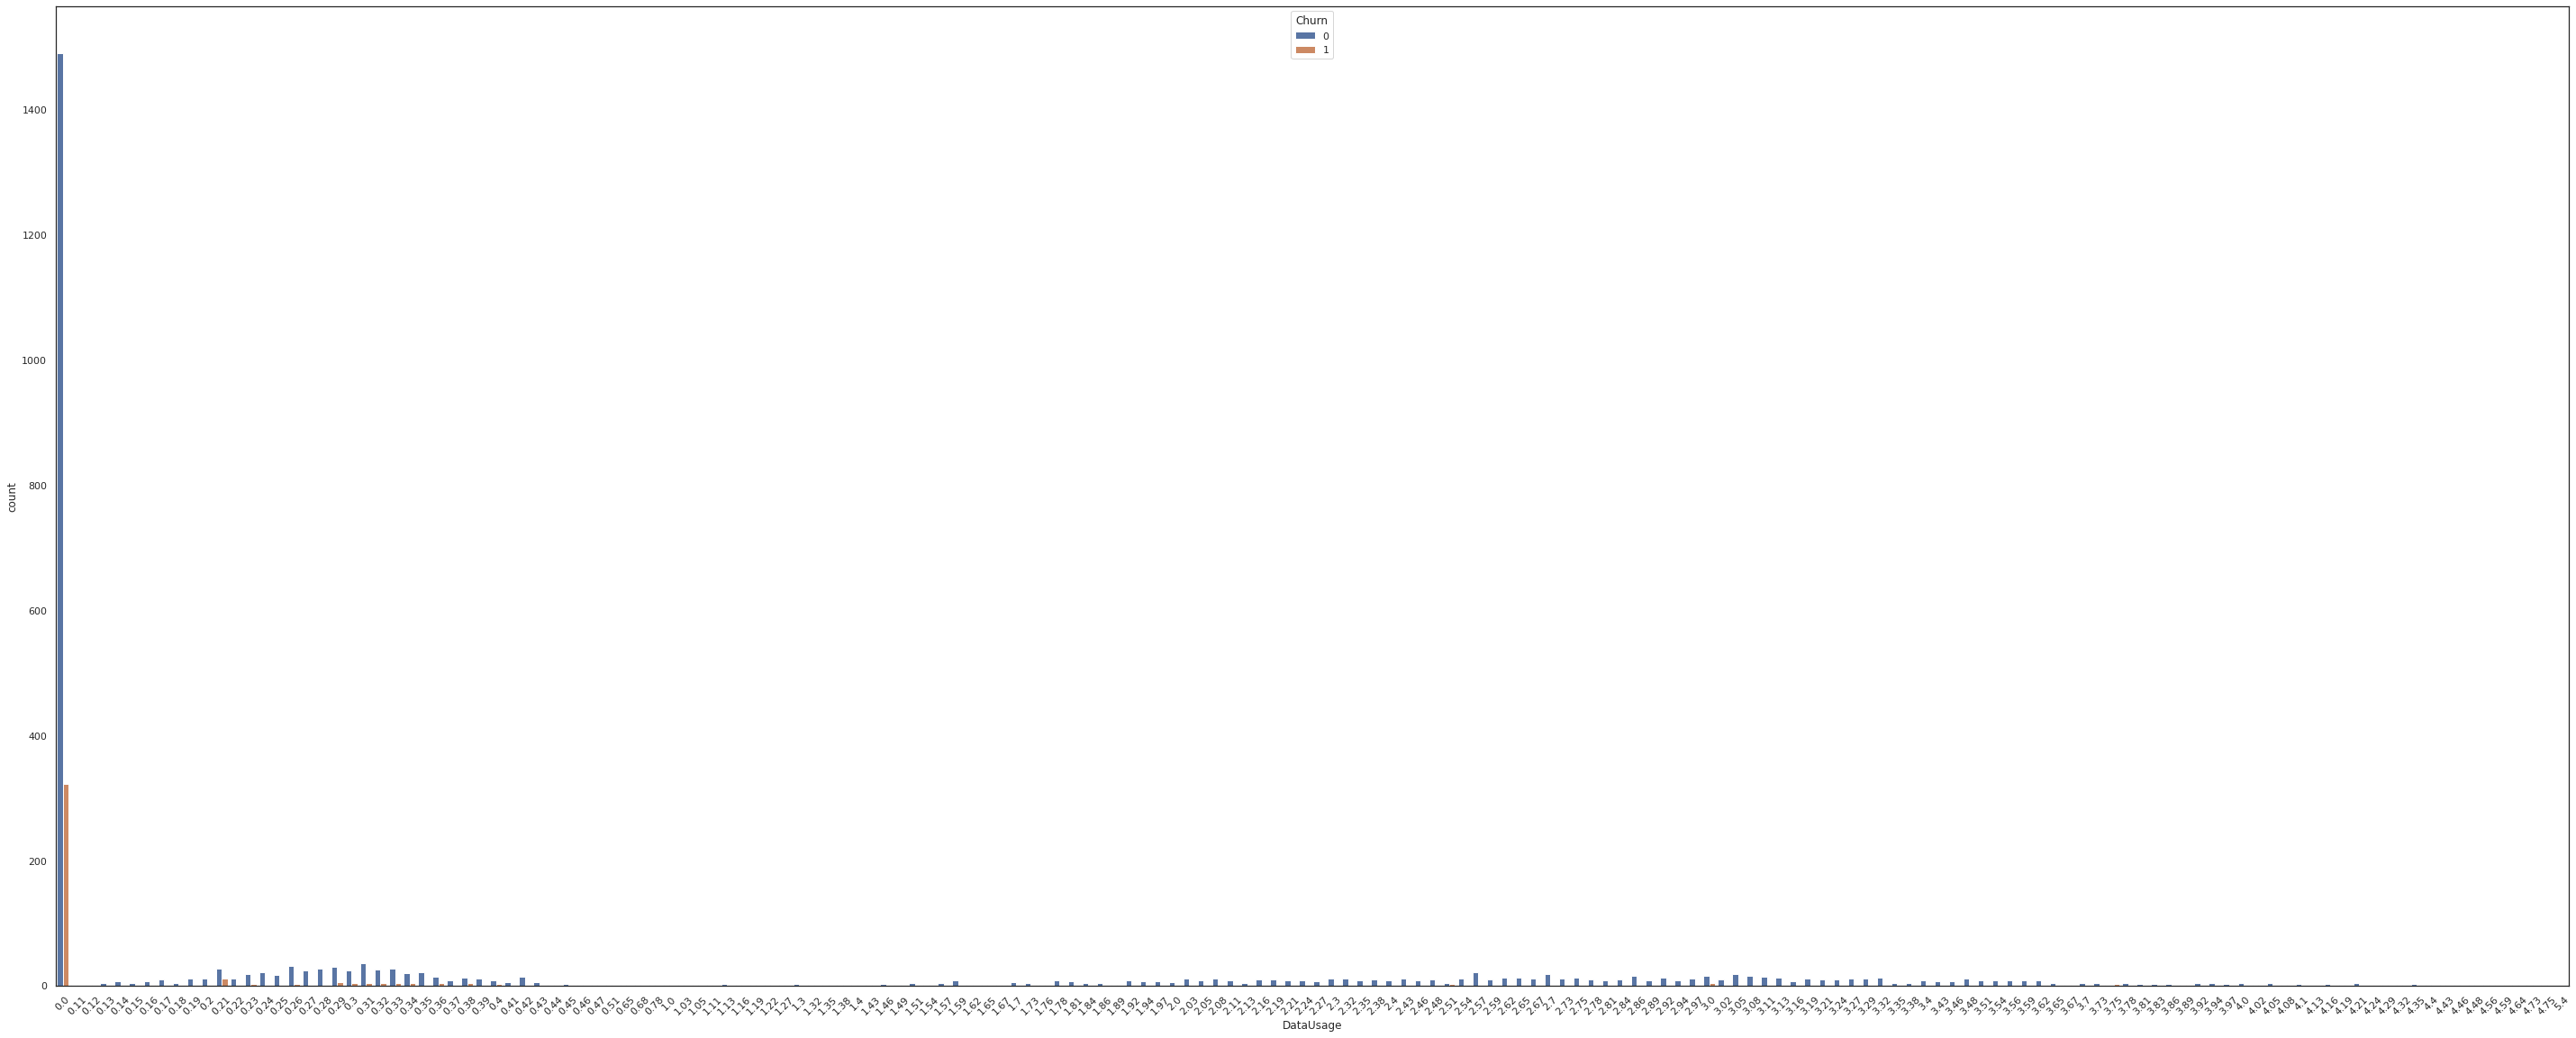

In [40]:
plt.figure(figsize=(50,20)) 
sns.set(style='white')
sns.countplot(x="DataUsage",hue="Churn",data=df) 
plt.xticks(rotation=45,)

##**From the above plot, if the DataUsage is 0(zero), then Customer Churn is more**

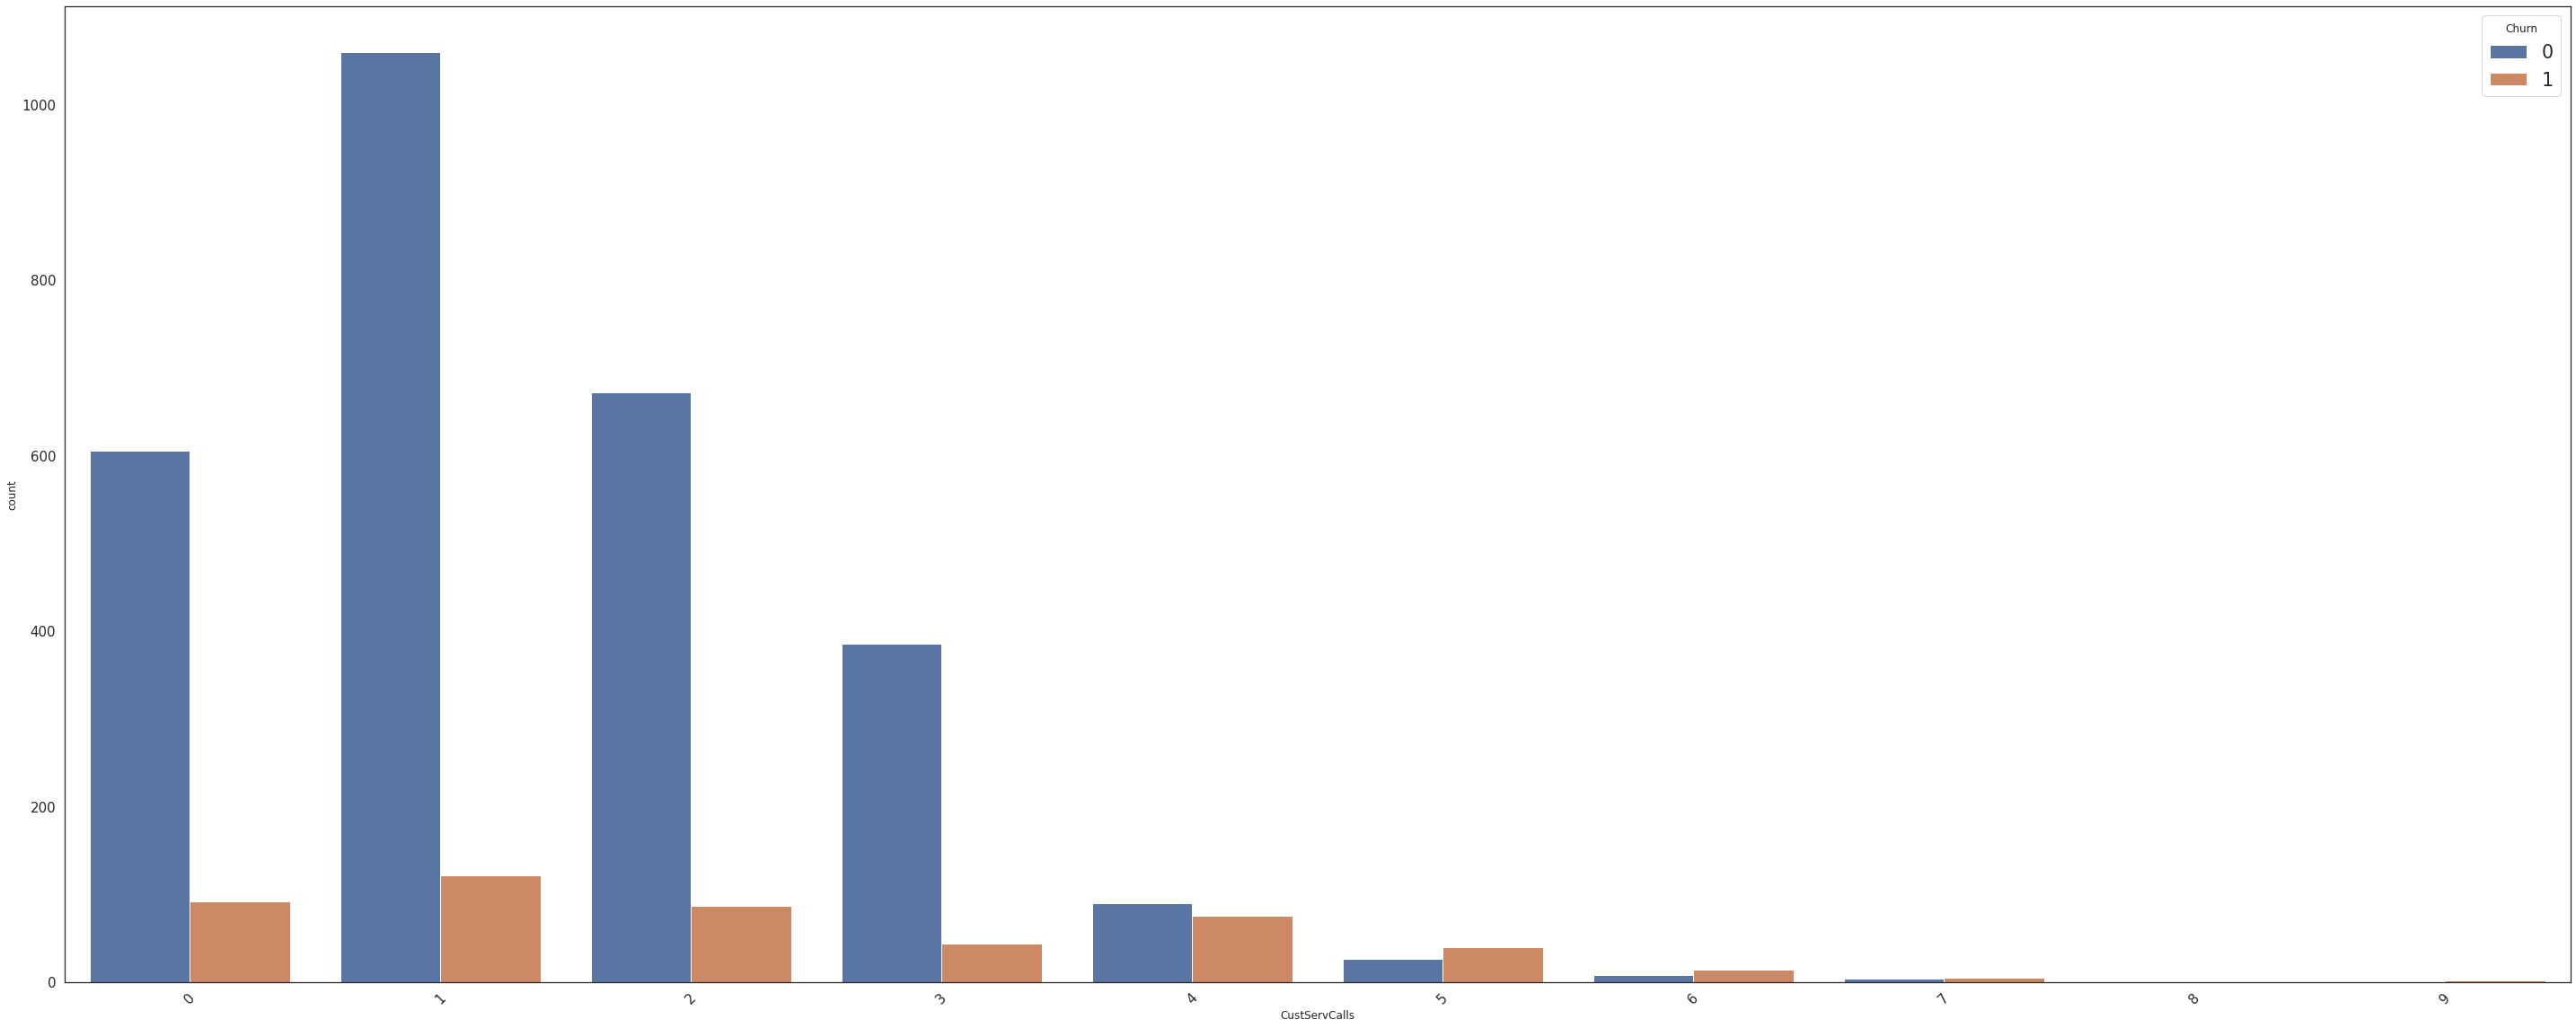

In [41]:
plt.figure(figsize=(50,20)) 
sns.set(style='white')
sns.countplot(x="CustServCalls",hue="Churn",data=df) 
plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(title = "Churn", fontsize = 'xx-large')

##**From the above graph, if the CustServCalls are more than 3, then Churn is more**

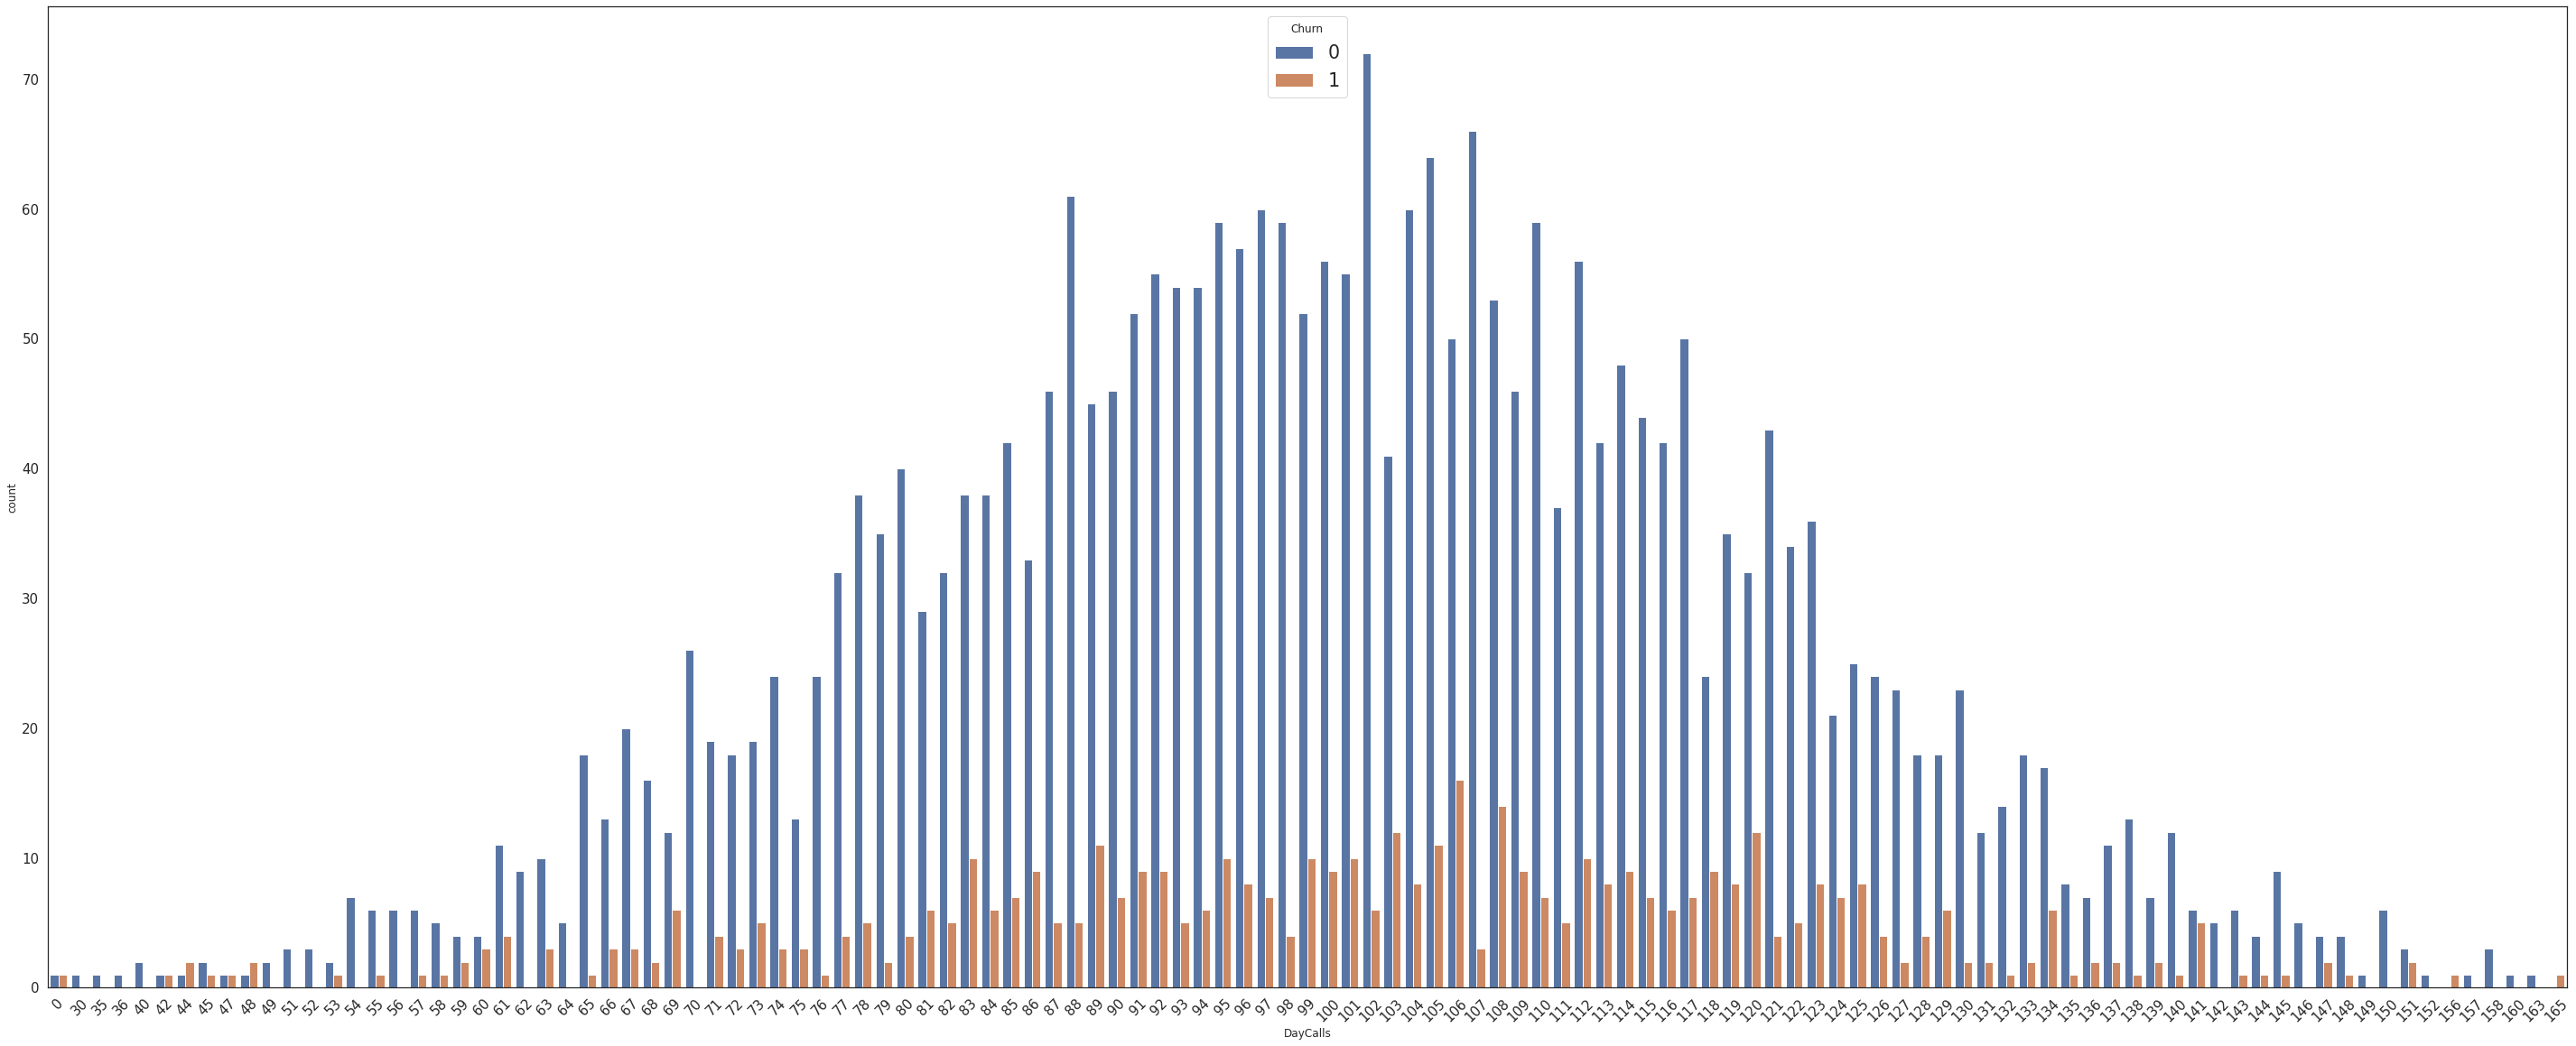

In [42]:
plt.figure(figsize=(50,20)) 
sns.set(style='white')
sns.countplot(x="DayCalls",hue="Churn",data=df) 
plt.xticks(rotation=45,fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(title = "Churn", fontsize = 'xx-large')

##**From the above plot, if the DayCalls are more than 80 i.e. in the range 80-120 DayCalls, the Customer Churn is more**

In [43]:
X = df.drop(['Churn'],axis = 1)

##Distribution of numerical features - Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2ab6d50250>,
      dtype=object)

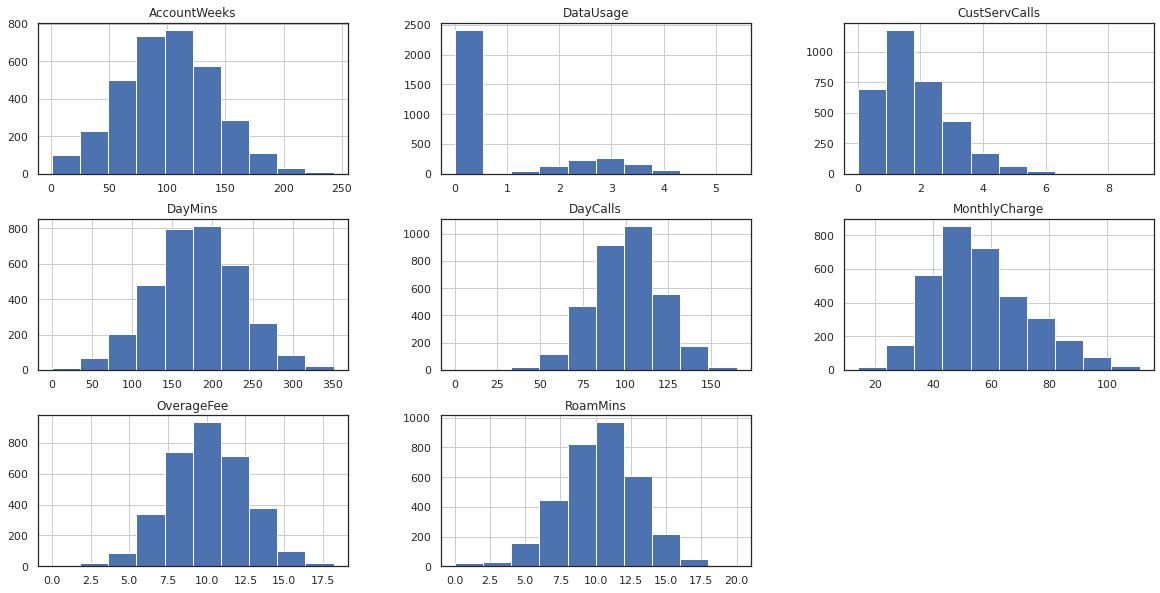

In [44]:
X.hist(column = ["AccountWeeks","DataUsage","CustServCalls","DayMins","DayCalls","MonthlyCharge","OverageFee","RoamMins"],figsize = (20,10))

In [45]:
from imblearn.over_sampling import SMOTE

In [46]:
sm = SMOTE(random_state = 0, sampling_strategy = 'minority', k_neighbors= 5)
X, Y = sm.fit_resample(X, Y.ravel())

In [47]:
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(Y))

Original unbalanced dataset shape 3333
Resampled balanced dataset shape 5700


In [48]:
balanced_df = pd.DataFrame(X, columns=list(i for i in list(df.describe(include='all').columns) if i != 'Churn'))

balanced_df['Churn'] = Y

In [49]:
balanced_df

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,Churn
0,128,1,1,2.700000,1,265.100000,110,89.000000,9.870000,10.000000,0
1,107,1,1,3.700000,1,161.600000,123,82.000000,9.780000,13.700000,0
2,137,1,0,0.000000,0,243.400000,114,52.000000,6.060000,12.200000,0
3,84,0,0,0.000000,2,299.400000,71,57.000000,3.100000,6.600000,0
4,75,0,0,0.000000,3,166.700000,113,41.000000,7.420000,10.100000,0
...,...,...,...,...,...,...,...,...,...,...,...
5695,120,1,0,1.020344,2,203.196365,129,55.754731,6.115668,5.624950,1
5696,126,0,0,0.000000,2,245.412689,99,62.690889,12.066673,13.392733,1
5697,2,0,0,0.258460,1,131.287959,43,37.541866,7.013681,9.005974,1
5698,115,0,0,0.149981,3,120.615558,116,42.268947,11.571468,11.876789,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


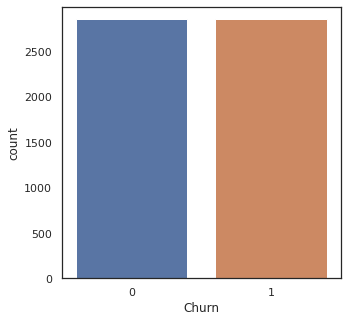

In [50]:
plt.figure(figsize=(5,5))
sns.countplot('Churn', data = balanced_df)

In [51]:
balanced_df['Churn'].value_counts()

0    2850
1    2850
Name: Churn, dtype: int64

##Feature Importance

In [52]:
Y1 = balanced_df['Churn']

In [53]:
X1 = balanced_df.drop(['Churn'],axis=1)
X1.columns

Index(['AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [54]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X1,Y1) 
feature_imp = pd.DataFrame(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
ContractRenewal,0.194901
DayMins,0.169398
MonthlyCharge,0.162508
CustServCalls,0.116550
OverageFee,0.071018
DataUsage,0.066498
RoamMins,0.059724
DayCalls,0.058452
AccountWeeks,0.057377
DataPlan,0.043574


In [55]:
X1

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.700000,1,265.100000,110,89.000000,9.870000,10.000000
1,107,1,1,3.700000,1,161.600000,123,82.000000,9.780000,13.700000
2,137,1,0,0.000000,0,243.400000,114,52.000000,6.060000,12.200000
3,84,0,0,0.000000,2,299.400000,71,57.000000,3.100000,6.600000
4,75,0,0,0.000000,3,166.700000,113,41.000000,7.420000,10.100000
...,...,...,...,...,...,...,...,...,...,...
5695,120,1,0,1.020344,2,203.196365,129,55.754731,6.115668,5.624950
5696,126,0,0,0.000000,2,245.412689,99,62.690889,12.066673,13.392733
5697,2,0,0,0.258460,1,131.287959,43,37.541866,7.013681,9.005974
5698,115,0,0,0.149981,3,120.615558,116,42.268947,11.571468,11.876789


In [56]:
Y1

0       0
1       0
2       0
3       0
4       0
       ..
5695    1
5696    1
5697    1
5698    1
5699    1
Name: Churn, Length: 5700, dtype: int64

##Train Set and Test Set

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X1, Y1, test_size=0.2, random_state = 42)

# ML Classification Models

## Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr=LogisticRegression(penalty='l2', solver = 'liblinear', max_iter = 500)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=500, solver='liblinear')

In [65]:
lr.predict(x_test)

array([0, 1, 1, ..., 0, 0, 0])

In [66]:
print(classification_report(y_test, lr.predict(x_test), target_names=['Churn','No Churn']))

              precision    recall  f1-score   support

       Churn       0.79      0.81      0.80       585
    No Churn       0.79      0.78      0.78       555

    accuracy                           0.79      1140
   macro avg       0.79      0.79      0.79      1140
weighted avg       0.79      0.79      0.79      1140



In [67]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr.predict_proba(x_test)[:, 1])

0.8589697389697389

##Random Forest

In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(max_depth=6)
param_grid = {'criterion': ['gini','entropy'], 'n_estimators': [100,200,500]}
RF = RandomForestClassifier()
grid_search = GridSearchCV(RF,param_grid,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'criterion': 'entropy', 'n_estimators': 500}

In [100]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion='entropy', n_estimators= 500)
RF.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [101]:
RF.predict(x_test)

array([0, 0, 1, ..., 0, 0, 0])

In [102]:
print(classification_report(y_test, RF.predict(x_test), target_names=['Churn','No Churn']))

              precision    recall  f1-score   support

       Churn       0.93      0.90      0.92       585
    No Churn       0.90      0.93      0.92       555

    accuracy                           0.92      1140
   macro avg       0.92      0.92      0.92      1140
weighted avg       0.92      0.92      0.92      1140



In [103]:
roc_auc_score(y_test, RF.predict_proba(x_test)[:, 1])

0.9785277585277585

##XGBoost Classifier

In [94]:
import xgboost as xgb
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth = 3)
param_grid = {'learning_rate': [0.001,0.01,0.1,1], 'n_estimators': [10,50,100,200,500]}
xgbc = XGBClassifier()
grid_search = GridSearchCV(xgbc,param_grid,cv=5)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'learning_rate': 1, 'n_estimators': 500}

In [95]:
import xgboost as xgb
from xgboost import XGBClassifier

In [96]:
xgbc = XGBClassifier(learning_rate=1, n_estimators=500)
xgbc.fit(x_train,y_train)

XGBClassifier(learning_rate=1, n_estimators=500)

In [97]:
print(classification_report(y_test, xgbc.predict(x_test), target_names=['Churn','No Churn']))

              precision    recall  f1-score   support

       Churn       0.94      0.91      0.93       585
    No Churn       0.91      0.94      0.92       555

    accuracy                           0.93      1140
   macro avg       0.93      0.93      0.93      1140
weighted avg       0.93      0.93      0.93      1140



In [98]:
roc_auc_score(y_test, xgbc.predict_proba(x_test)[:, 1])

0.9756895356895356

##**Out of the 3 Classification models, Random Forest gives better AU-ROC score of 0.978, hence this model is chosen**